# Table of Contents
#### Import libraries
#### Import dataset
#### Busiest days of week calculation and visualization
#### Highest spending per time of day calculation and visualization
#### Create simpler price groupings
#### Analysis of customer profiles with ordering habits

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Define path
path = r'C:\Users\cschm\Desktop\CareerFoundry\Achievement 4\Instacart Basket Analysis'

In [3]:
#Import dataset
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_active.pkl'))

In [4]:
df.shape

(30964564, 35)

In [5]:
#Remove column limits for full view
pd.options.display.max_columns = None

In [6]:
df.head()

,user_id,Gender,STATE,Age,date_joined,number_dependants,fam_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,Busiest day,Busiest days,busiest_period_of_day,max_order,loyalty_flag,spender_flag,order_frequency,order_freq_flag,avg_spend,Region,department,age_range,income_range,parental_status
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2543867,5,1,9,30.0,2,0,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,Low spender,19.0,Regular customer,7.988889,Midwest,beverages,Middle-age,High,Parent
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,1285508,7,5,15,11.0,1,1,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,Low spender,19.0,Regular customer,7.988889,Midwest,beverages,Middle-age,High,Parent
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2578584,8,1,15,10.0,2,1,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,Low spender,19.0,Regular customer,7.988889,Midwest,beverages,Middle-age,High,Parent
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,518967,1,2,9,NaN,1,0,Low-range product,Regularly busy,Regularly busy,Most orders,8,New customer,Low spender,19.0,Regular customer,7.988889,Midwest,produce,Middle-age,High,Parent
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,2524893,3,3,11,30.0,2,1,Low-range product,Regularly busy,Least busy,Most orders,8,New customer,Low spender,19.0,Regular customer,7.988889,Midwest,produce,Middle-age,High,Parent


In [7]:
#Look at frequency of orders day of week variable
df['orders_day_of_week'].value_counts(dropna = False)

orders_day_of_week
0    5908610
1    5411686
6    4291304
5    4033729
2    4024706
3    3669535
4    3624994
Name: count, dtype: int64

Text(0.5, 1.0, 'Instacart Orders by Day of the Week')

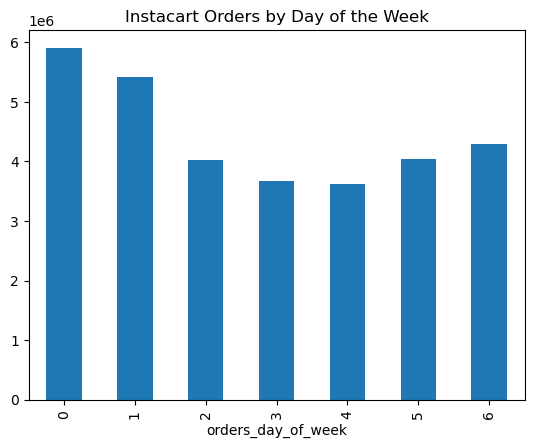

In [8]:
#Create bar chart of orders day of week frequency
bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.title('Instacart Orders by Day of the Week')

In [9]:
#Export bar chart as png
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_day_of_week.png'))

##### Create new variable 'order_totals" in order to plot line graph of average total spending by hour of the day

In [4]:
#Create order total variable
df['order_totals'] = df.groupby('order_id')['prices'].sum()

In [37]:
df.head()

,user_id,Gender,STATE,Age,date_joined,number_dependants,fam_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,Busiest day,Busiest days,busiest_period_of_day,max_order,loyalty_flag,spender_flag,order_frequency,order_freq_flag,avg_spend,Region,department,age_range,income_range,parental_status,order_totals
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2543867,5,1,9,30.0,2,0,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,Low spender,19.0,Regular customer,7.988889,Midwest,beverages,Middle-age,High,Parent,NaN
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,1285508,7,5,15,11.0,1,1,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,Low spender,19.0,Regular customer,7.988889,Midwest,beverages,Middle-age,High,Parent,NaN
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,77,7,9.0,2578584,8,1,15,10.0,2,1,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,Low spender,19.0,Regular customer,7.988889,Midwest,beverages,Middle-age,High,Parent,91.6
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,518967,1,2,9,NaN,1,0,Low-range product,Regularly busy,Regularly busy,Most orders,8,New customer,Low spender,19.0,Regular customer,7.988889,Midwest,produce,Middle-age,High,Parent,70.3
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,32,4,4.3,2524893,3,3,11,30.0,2,1,Low-range product,Regularly busy,Least busy,Most orders,8,New customer,Low spender,19.0,Regular customer,7.988889,Midwest,produce,Middle-age,High,Parent,92.8


In [5]:
#Calculate average of order totals by hour of day
df.groupby('order_hour_of_day')['order_totals'].mean()

order_hour_of_day
0     78.122126
1     78.305713
2     79.042190
3     77.835651
4     79.594676
5     79.429058
6     79.138566
7     78.605096
8     78.835069
9     78.664991
10    78.745180
11    78.694728
12    78.486233
13    78.771826
14    78.705588
15    78.788770
16    78.763959
17    78.745308
18    78.933229
19    78.556906
20    78.943920
21    78.432315
22    78.680566
23    78.956707
Name: order_totals, dtype: float64

(75.0, 80.0)

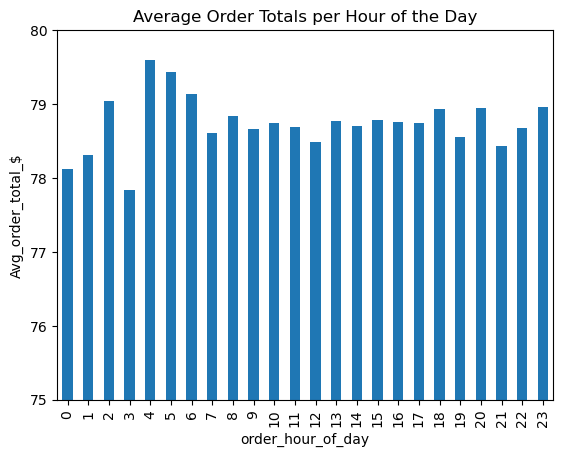

In [9]:
a = df.groupby('order_hour_of_day')['order_totals'].mean().plot.bar()
plt.title('Average Order Totals per Hour of the Day')
plt.ylabel('Avg_order_total_$')
plt.ylim(75,80)

In [10]:
#Export bar chart to png
a.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_order_totals_by_hour.png'))

##### Create simple price groupings

In [53]:
df['prices'].max()

25.0

Text(0.5, 0, 'Product Price in $')

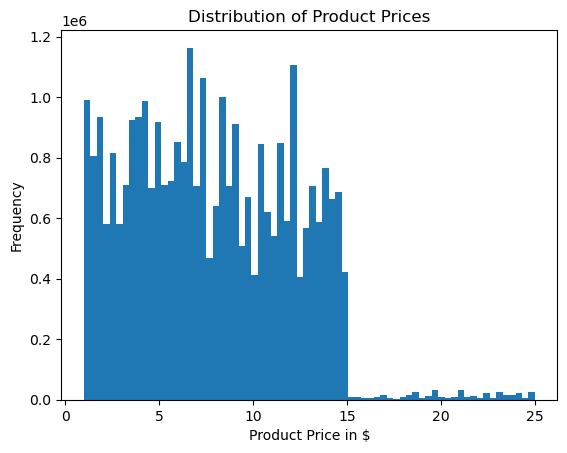

In [63]:
#Plot price distribution
hist = df['prices'].plot.hist(bins = 70)
plt.title('Distribution of Product Prices')
plt.xlabel('Product Price in $')

In [64]:
#Export histogram to png
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

Text(0.5, 1.0, 'Frequency of Product Price Ranges')

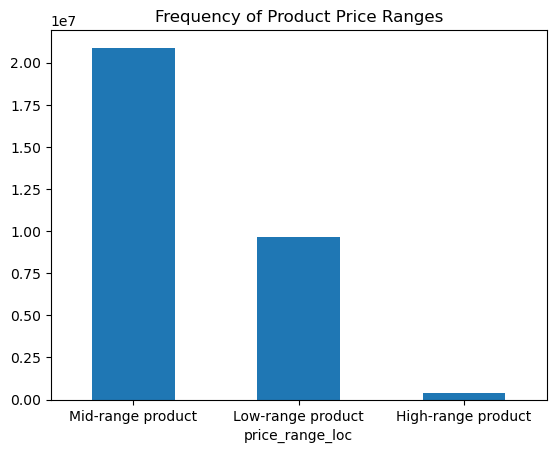

In [68]:
#Create bar chart for price ranges
b = df['price_range_loc'].value_counts().plot.bar()
plt.xticks(rotation = 0)
plt.title('Frequency of Product Price Ranges')

In [69]:
#Export bar to png
b.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_price_range.png'))

##### Further analysis of customer profiles and their spending habits

In [75]:
# Compare min, max, and mean of order totals by income range
df.groupby('income_range').agg({'order_totals': ['mean', 'min', 'max']})

order_totals             
                     mean  min     max
income_range                          
High            78.524976  0.0   751.1
High average    78.743180  0.0   852.5
Low             78.657496  0.0  1092.2
Low average     78.776730  0.0  1047.4

Text(0, 0.5, 'Total Order Amounts in $')

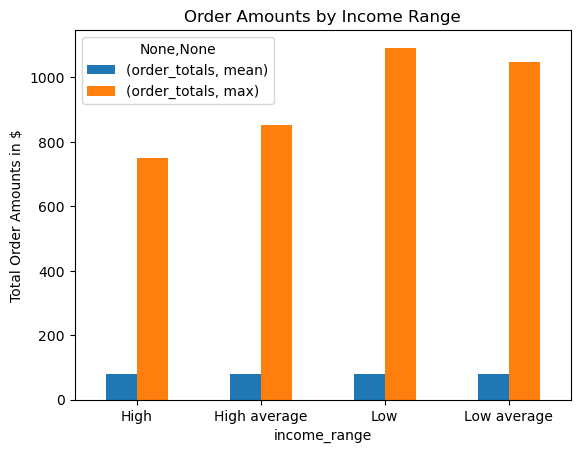

In [79]:
#Create bar
c = df.groupby('income_range').agg({'order_totals': ['mean', 'max']}).plot.bar()
plt.title('Order Amounts by Income Range')
plt.xticks(rotation = 0)
plt.ylabel('Total Order Amounts in $')

In [80]:
#Export bar to png
c.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_order_totals_income.png'))

In [81]:
# Compare max and mean of order totals by family status
df.groupby('fam_status').agg({'order_totals': ['mean', 'max']})

C:\Users\cschm\AppData\Local\Temp\ipykernel_9072\2821065025.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('fam_status').agg({'order_totals': ['mean', 'max']})


order_totals        
                                         mean     max
fam_status                                           
divorced/widowed                    78.808156   842.1
living with parents and siblings    78.856475   712.0
married                             78.688749  1092.2
single                              78.778039   846.1

C:\Users\cschm\AppData\Local\Temp\ipykernel_9072\979251787.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  d = df.groupby('fam_status').agg({'order_totals': ['mean', 'max']}).plot.bar()


Text(0, 0.5, 'Total Order Amounts in $')

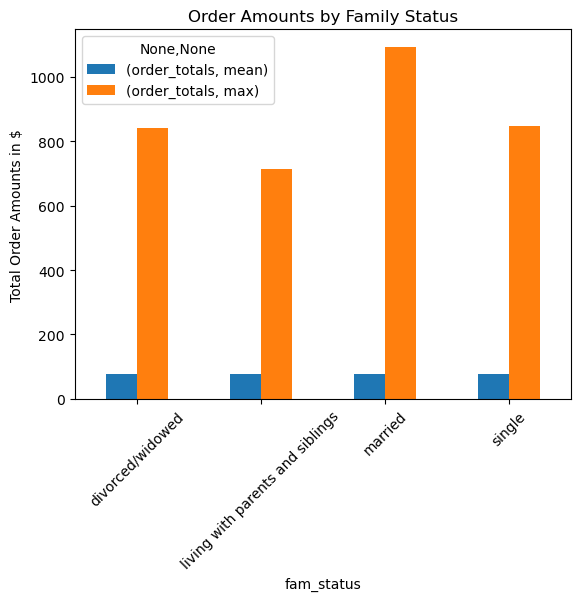

In [83]:
#Create bar
d = df.groupby('fam_status').agg({'order_totals': ['mean', 'max']}).plot.bar()
plt.title('Order Amounts by Family Status')
plt.xticks(rotation = 45)
plt.ylabel('Total Order Amounts in $')

In [84]:
#Export bar to png
d.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_order_totals_family_status.png'))

In [8]:
#Export df to close notebook
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_active.pkl'))